## Time series analysis for average bike trafic prediction in Paris and Rennes

The purpose is to forecast bike traffic in Paris and Rennes for 2023 for the metropoles to define the bike infrastructures creation plan.

In [35]:
# Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

Starting with Rennes as we have a lot more data (start in 2014 vs Paris in 2021).

First step : train with data from 2014 to 2021 and validation data for 2022.

In [31]:
# Load data

comptages_rennes = './datasets/comptages_journaliers_rennes.csv'

with open(comptages_rennes, 'r') as rennes:
    df_comptage_rennes = pd.read_csv(rennes)

df_comptage_rennes.drop([0,1], axis=0, inplace=True)
df_comptage_rennes.rename(columns={'Unnamed: 0':'date', 'name':'measure_points', 'counts':'bike_count'}, inplace=True)
df_comptage_rennes['measure_points'] = pd.to_numeric(df_comptage_rennes['measure_points'])
df_comptage_rennes['bike_count'] = pd.to_numeric(df_comptage_rennes['bike_count'])
df_comptage_rennes['date'] = pd.to_datetime(df_comptage_rennes['date'])
df_comptage_rennes['weighted_bc'] = df_comptage_rennes['bike_count'] / df_comptage_rennes['measure_points']
df_comptage_rennes.head()

,date,measure_points,bike_count,weighted_bc
2,2014-11-06,1,231.0,231.0
3,2014-11-07,1,310.0,310.0
4,2014-11-08,1,211.0,211.0
5,2014-11-09,1,162.0,162.0
6,2014-11-10,1,288.0,288.0


In [32]:
df_comptage_rennes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 2 to 2980
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2979 non-null   datetime64[ns]
 1   measure_points  2979 non-null   int64         
 2   bike_count      2979 non-null   float64       
 3   weighted_bc     2979 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 93.2 KB


In [34]:
df_comptage_rennes.describe(include='all', datetime_is_numeric=True)

,date,measure_points,bike_count,weighted_bc
count,2979,2979.000000,2979.000000,2979.000000
mean,2018-12-09 14:27:40.422960640,1.470292,1682.079557,986.922793
min,2014-11-06 00:00:00,1.000000,0.000000,0.000000
25%,2016-11-19 12:00:00,1.000000,317.000000,314.000000
50%,2018-12-14 00:00:00,1.000000,1321.000000,774.000000
75%,2020-12-27 12:00:00,2.000000,2899.000000,1623.000000
max,2023-01-11 00:00:00,2.000000,5342.000000,3080.000000
std,NaN,0.499200,1487.065450,750.317658


In [20]:
df_comptage_rennes.isnull().sum()

date              0
measure_points    0
bike_count        0
weighted_bc       0
dtype: int64

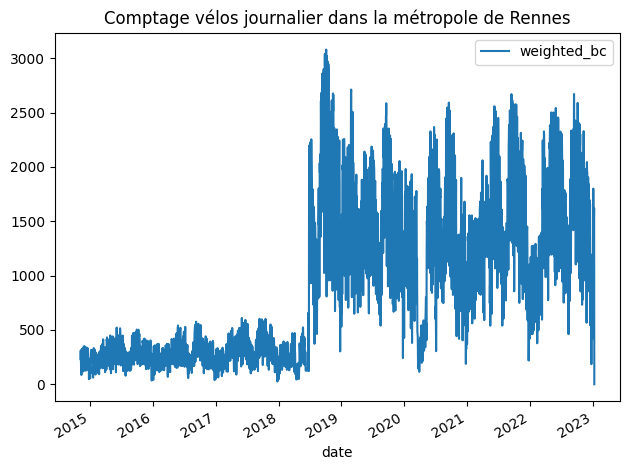

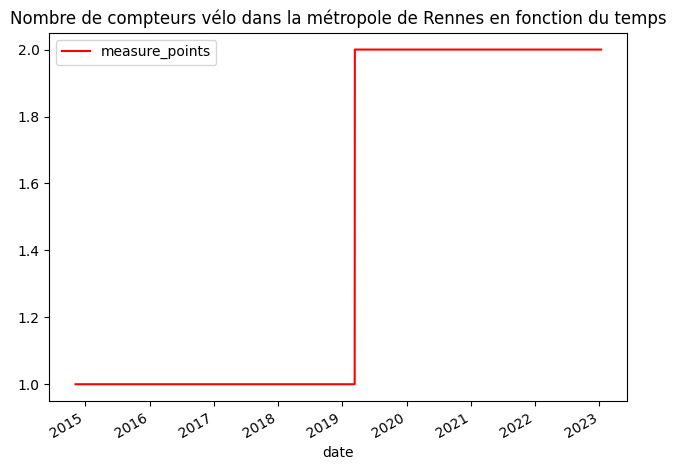

In [40]:
df_comptage_rennes.plot(x='date', y='weighted_bc', title='Comptage vélos journalier dans la métropole de Rennes')
plt.tight_layout()
plt.show()

df_comptage_rennes.plot(x='date', y='measure_points', title='Nombre de compteurs vélo dans la métropole de Rennes en fonction du temps', color='red')
plt.tight_layout()
plt.show();

        date  measure_points  bike_count  weighted_bc
2 2021-11-29               2         0.0     0.000000
3 2021-12-01              65    149322.0  2297.261538
4 2021-12-02              65    173378.0  2667.353846
5 2021-12-03              65    109700.0  1687.692308
6 2021-12-04              65     80708.0  1241.661538


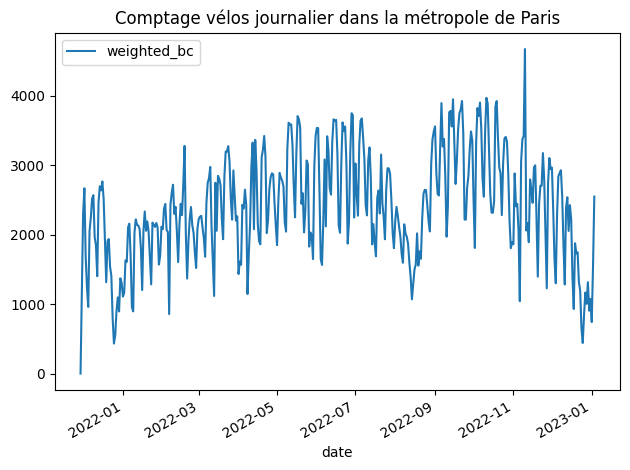

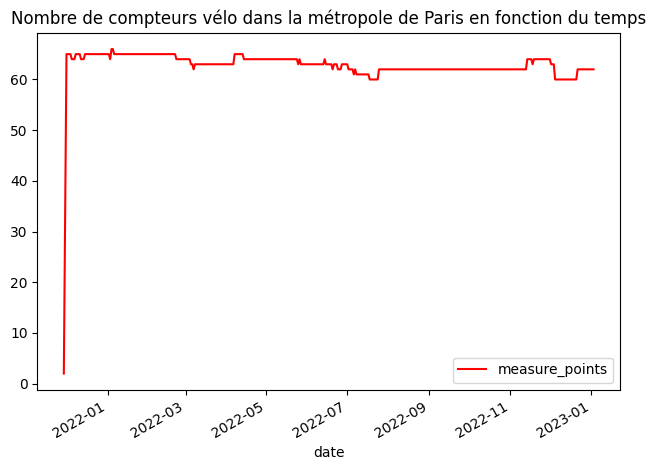

In [42]:
# Load data

comptages_paris = './datasets/comptages_journaliers_paris.csv'

with open(comptages_paris, 'r') as paris:
    df_comptage_paris = pd.read_csv(paris)

df_comptage_paris.drop([0,1], axis=0, inplace=True)
df_comptage_paris.rename(columns={'Unnamed: 0':'date', 'name':'measure_points', 'sum_counts':'bike_count'}, inplace=True)
df_comptage_paris['measure_points'] = pd.to_numeric(df_comptage_paris['measure_points'])
df_comptage_paris['bike_count'] = pd.to_numeric(df_comptage_paris['bike_count'])
df_comptage_paris['date'] = pd.to_datetime(df_comptage_paris['date'])
df_comptage_paris['weighted_bc'] = df_comptage_paris['bike_count'] / df_comptage_paris['measure_points']
print(df_comptage_paris.head())

df_comptage_paris.plot(x='date', y='weighted_bc', title='Comptage vélos journalier dans la métropole de Paris')
plt.tight_layout()
plt.show()

df_comptage_paris.plot(x='date', y='measure_points', title='Nombre de compteurs vélo dans la métropole de Paris en fonction du temps', color='red')
plt.tight_layout()
plt.show();

In [ ]:
values = df_comptage_paris.values

n_train_time = 